In [55]:
import pandas as pd
from pandas import Series, DataFrame

In [56]:
# set up panda dataframe

titanic_df = pd.read_csv("/Users/sonya/Downloads/train.csv")

In [57]:
titanic_df = pd.read_csv("train.csv")

In [58]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
titanic_df.info()
# everything has 891, but cabin has ony 204 datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [60]:
# Question 1:Who were the passengers? 
# 2) what deck were the passendger on 



In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

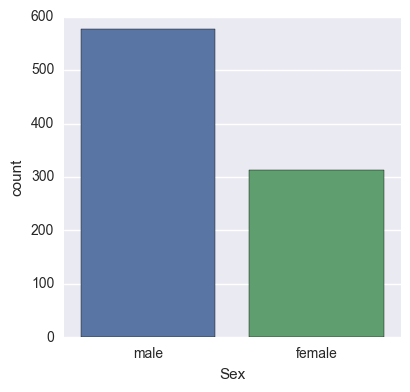

In [62]:
# check who is on board, build a bar chart by sex

sns.factorplot("Sex",data=titanic_df,kind="count")

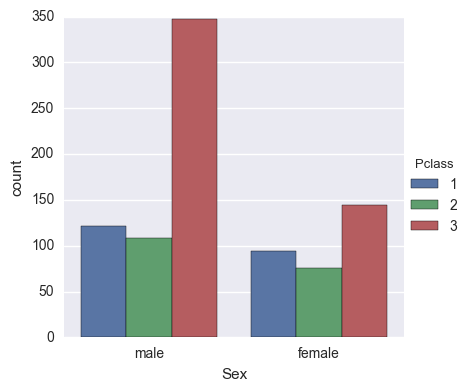

In [63]:
# check or see how the Pclass situation or distribution for each sex
sns.factorplot("Sex",data=titanic_df,hue="Pclass",kind="count")

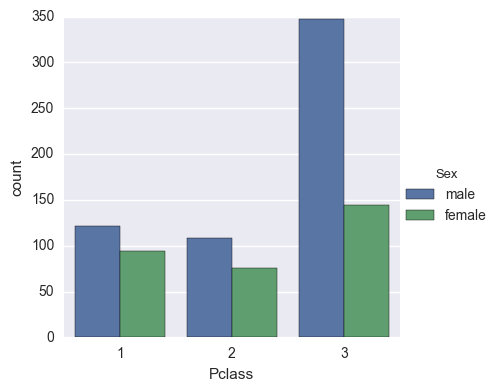

In [64]:
# check or see how the sex distribution for each Pclass
# there are way more male in 3rd class than in other class

sns.factorplot("Pclass",data=titanic_df,hue="Sex",kind="count")

In [65]:
# use apply technique to separate out children from other people
# define children

def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return "child"
    else:
        return sex

In [66]:
titanic_df["person"] = titanic_df[["Age","Sex"]].apply(male_female_child,axis=1)

In [67]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


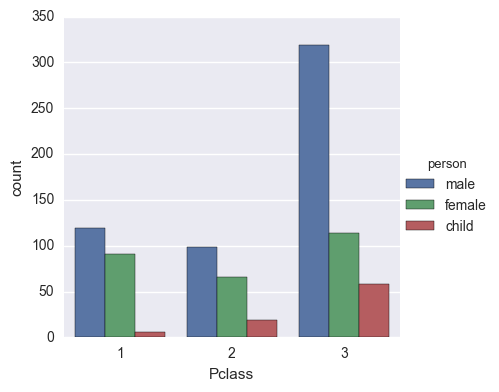

In [68]:
sns.factorplot("Pclass",data=titanic_df,hue="person",kind="count")

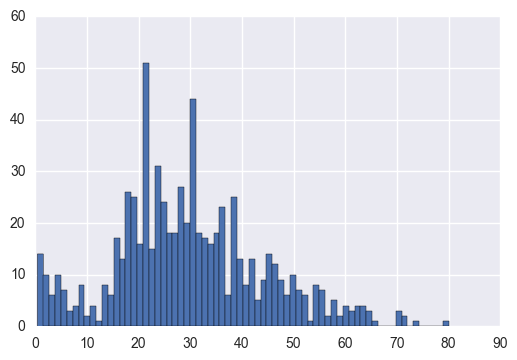

In [69]:
#craete a distribution of the age using histogram using pandas

titanic_df["Age"].hist(bins=70)

In [70]:
titanic_df["Age"].mean()

29.69911764705882

In [71]:
# look at the number of data points for each category

titanic_df["person"].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


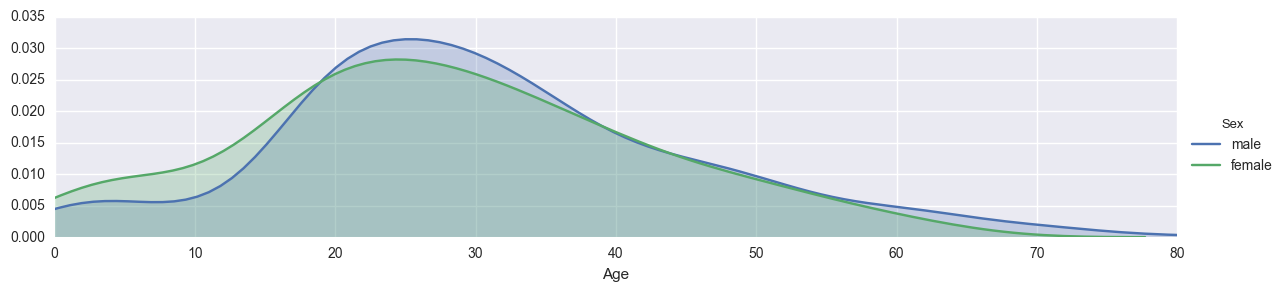

In [72]:
fig = sns.FacetGrid(titanic_df, hue="Sex", aspect=4) #to create the grid for the graph, allow multiple graphs on the same panel, asepect is to set the ratio of the width
fig.map(sns.kdeplot,"Age",shade=True)

oldest = titanic_df["Age"].max()

# since no one will be negative age old
fig.set(xlim=(0,oldest))

fig.add_legend()

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


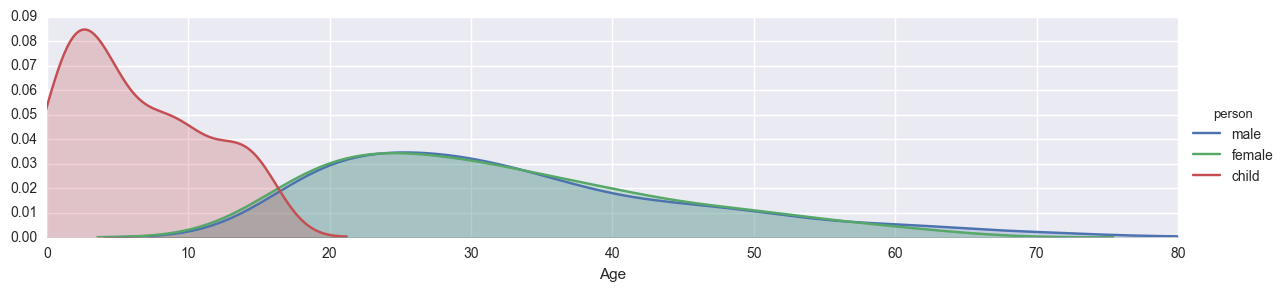

In [73]:
fig = sns.FacetGrid(titanic_df, hue="person", aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)
oldest=titanic_df["Age"].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


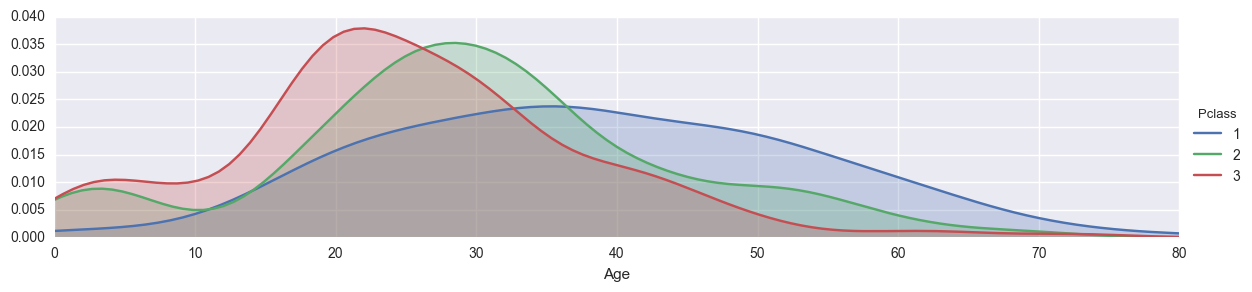

In [74]:
fig = sns.FacetGrid(titanic_df, hue="Pclass", aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)
oldest=titanic_df["Age"].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

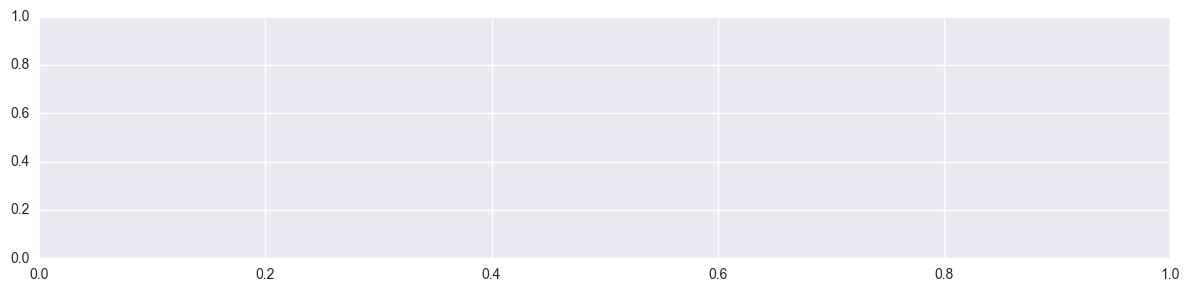

In [75]:
fig = sns.FacetGrid(titanic_df, hue="Pclass", aspect=4)


//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


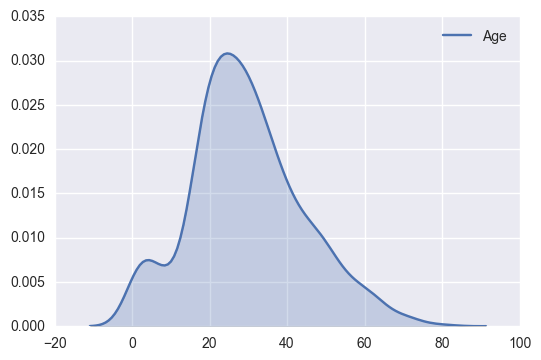

In [76]:
x=titanic_df["Age"]
sns.kdeplot(x,shade=True)

In [77]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [78]:
# drop null value of cabin

deck = titanic_df["Cabin"].dropna()

In [79]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

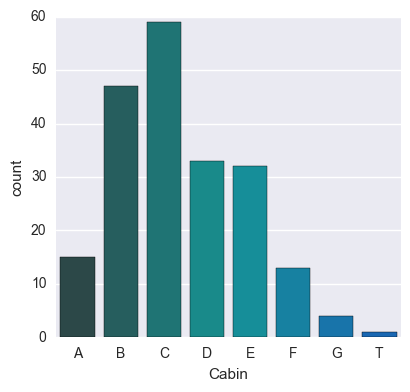

In [80]:
#look at the number of passengers in each cabin
#but since some passengers have null cabin info, we have to drop them to plot graph
# to do this, we first create an empty list
#grab letter of the deck using for loop, add the letter part (first item) to the new list
# make the new list into a dataframe
# then plot this new dataframe using factor plot

levels=[] #create an empty list

for level in deck:
    levels.append(level[0])
    
levels.sort()

cabin_df = DataFrame(levels)
#make and name a column of the cabin_df dataframe, since factorplot need to a column to plot
#use .columns to name or change the name of a column
cabin_df.columns=["Cabin"]

sns.factorplot("Cabin", data=cabin_df, kind="count",palette="winter_d")

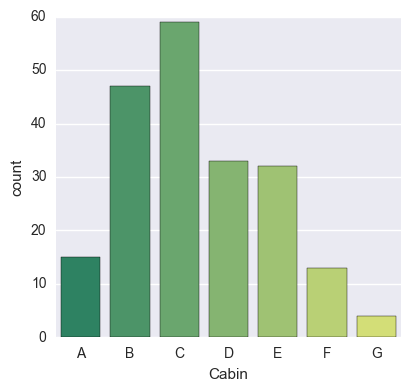

In [83]:
# the value for T cabin doens't make sense, to drop it

cabin_df = cabin_df[cabin_df.Cabin != 'T']
#define cabin_df dataframe equal to cabin_df dataframe COlumn Cabin where not equal to T Cabain

sns.factorplot("Cabin", data = cabin_df, kind="count", palette="summer")

In [84]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


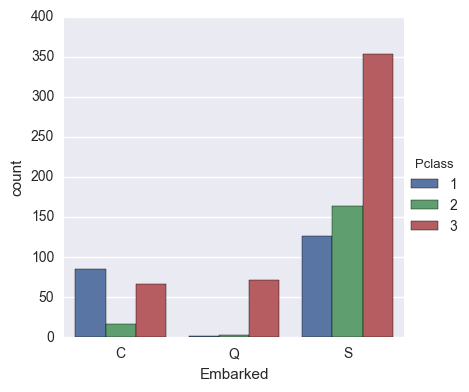

In [87]:
#check where passengers are from
#hue specify the class of passengers in each city
# S town has most of the 3rd class. 
# C town has a lot of 1st class people

sns.factorplot("Embarked",data=titanic_df, kind="count",hue="Pclass",x_order=["C","Q","S"])

In [88]:
# who was alone and who were with family
# adding a new column define what does alone means
# SibSp = 1-with sibling, 0-alone
# Parch = 1-with parent or children, 0-alone

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [90]:
titanic_df["Alone"]=titanic_df.SibSp + titanic_df.Parch

In [91]:
titanic_df["Alone"]

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [92]:
titanic_df["Alone"].loc[titanic_df["Alone"]>0] = "Wtih Family"
titanic_df["Alone"].loc[titanic_df["Alone"] == 0]="Alone"

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [93]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Wtih Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Wtih Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Wtih Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


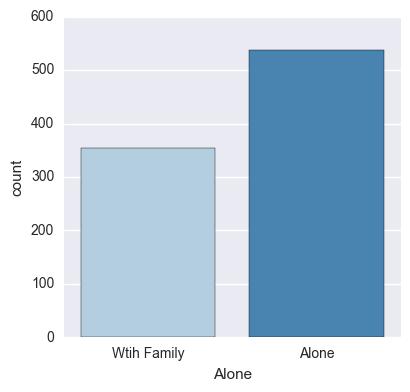

In [107]:
sns.factorplot("Alone",data=titanic_df,kind="count",palette="Blues")

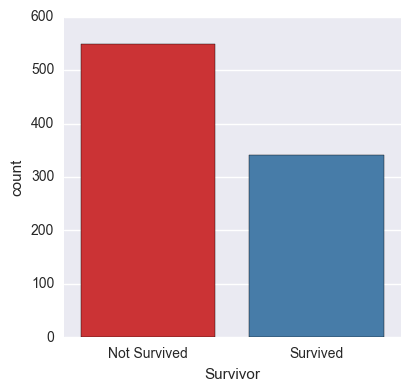

In [109]:
# what factor help someone to survive the sinking or crashing accident?
# use mapping to analysize
# make a new column called Survivor from the column "Survived"
# using the mapping function with dictionary to map 0 as "no", and 1 as "yes"

titanic_df["Survivor"] = titanic_df.Survived.map({0:"Not Survived",1:"Survived"})

sns.factorplot("Survivor", data=titanic_df, kind="count", palette="Set1")

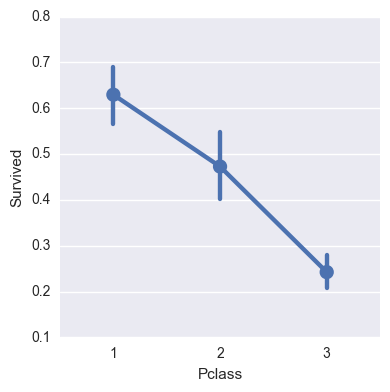

In [111]:
# see whether class is a survival factor
# use factorplot to plot Pclass vs. Survived
# from the graph, you can see that the survival rate for the 3rd class is lower

sns.factorplot("Pclass","Survived",data=titanic_df)

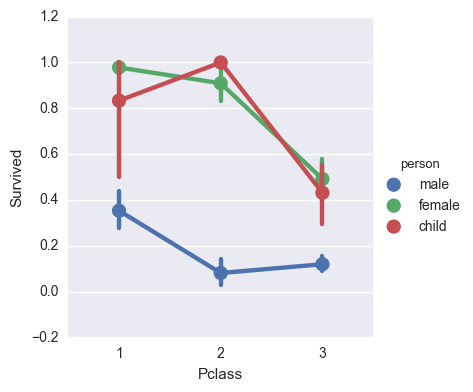

In [115]:
# since 3rd class higher percentage of male, and if female and chilren goes firt, then the survival rate for the 3rd class might be affected
# to also include the factor of gender into the graph, we can use the hue argument
# generally, 1st class has the highest survival rate among the three classes
# then chldren and female has a higher survival chance than males
# being a 3rd class male definitely is not favored for survival, dramatically affect your survival

sns.factorplot("Pclass","Survived", hue="person",data=titanic_df)


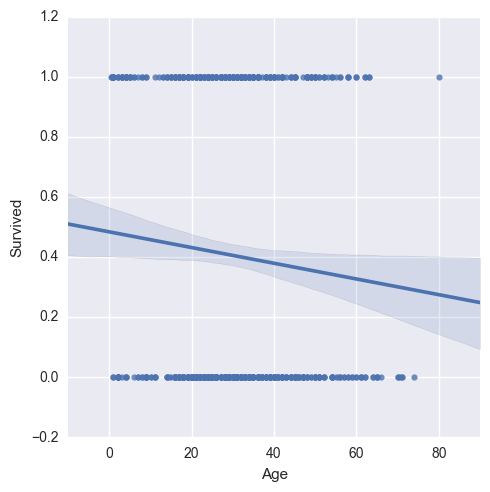

In [117]:
# we wonder if age is a significant factor for survival
# we can use linear line plotting to analyse
# from here we can see that for people who survived, the dots are mostly concentrated in the front and middle part of the age
# if we look at th linear line, the slpe tells that as the age goes higher, you have a smaller chance of survival

sns.lmplot("Age","Survived",data=titanic_df)


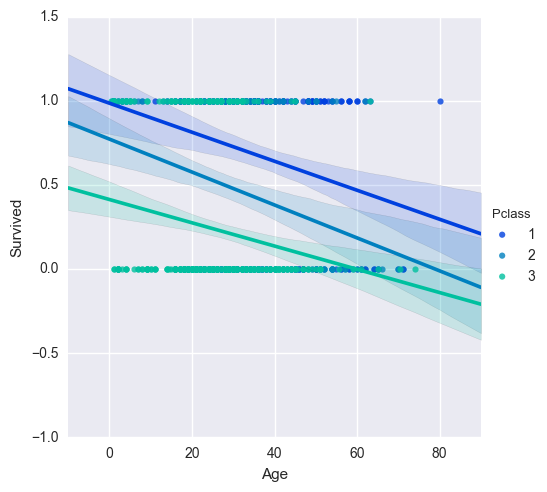

In [118]:
# use hue to see the effect of age and class
# you can see the difference in the three class: 3rd class still has the lowest survival probability
 

sns.lmplot("Age","Survived", hue="Pclass",data=titanic_df,palette="winter")

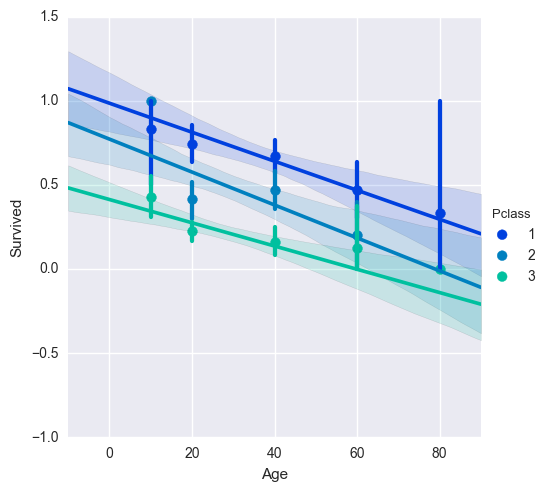

In [120]:
# clean up the above graph a little bit more

generations = [10,20,40,60,80] #make age bins
#Bin the x variable into discrete bins and then estimate the central tendency and a confidence interval. 

sns.lmplot("Age","Survived",hue="Pclass",data=titanic_df, palette="winter",x_bins=generations)

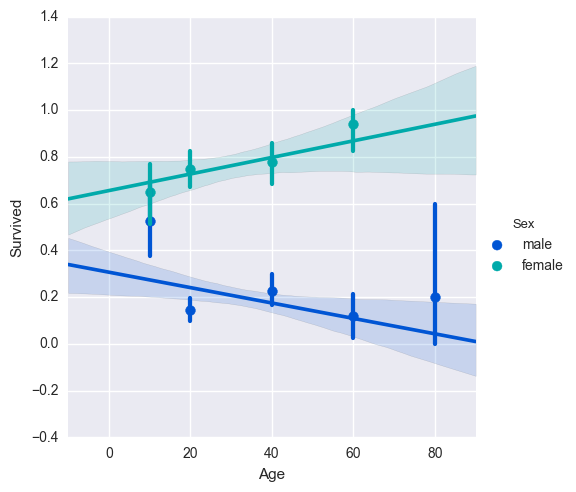

In [121]:
sns.lmplot("Age","Survived",hue="Sex",data=titanic_df,palette="winter",x_bins=generations)

# if you are older female, you have a higher chance of survival than an older male


In [122]:
# Did the deck have an effect on the passengers survival rate? 
# did this answer match with your intuition? 
# did having family memeber increase the odds of surviving the crash? 


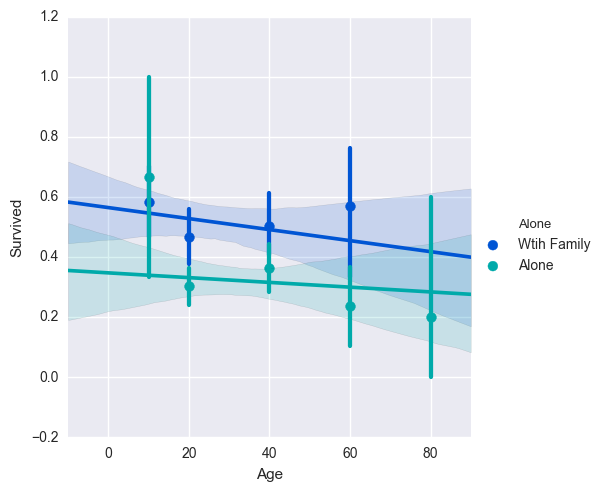

In [123]:
sns.lmplot("Age","Survived",hue="Alone",data=titanic_df,palette="winter",x_bins=generations)

In [125]:
#Teacher Jupyter Notebook link for this class:
# url=<http://nbviewer.jupyter.org/github/jmportilla/Udemy-notes/blob/master/Intro%20to%20Data%20Projects%20-%20Titanic.ipynb>
